In [1]:
import os
os.unlink('tweets.json')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'tweets.json'

In [2]:
import tweepy

In [3]:
from tweepy import Stream
from tweepy import StreamListener
from tweepy import OAuthHandler

In [4]:
## put keys here

consumer_key = "LRoxOwLNIBwxtCK59CWmqUsSV"
consumer_secret = "NHIXVqfIJ3jW40t4sWAR66k7kaw2sboJqAg6fwdOpUkxidlsWK" 

access_token = "1034315062088003584-rJaSMEccfyefHsXQK4Uwh31Icu02hu" 
access_secret ="ydVlSrmdnufUvBBSZoTKs4IeeVrUApIGMfkyV57uG0dHb" 

In [5]:
class DataFetch(StreamListener):
    def on_data(self,tweet):
        #print(tweet)
        fp = open("tweets.json","a")
        fp.write(tweet)
        fp.close()
    def on_error(self,error):
        print(f"\n\nError!!!!{error}\n\n")
    

In [6]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [7]:
fetch = DataFetch()

In [8]:
stream = Stream(auth,fetch)
stream.filter(track=[ 'corona'])

KeyboardInterrupt: 

In [9]:
fp = open("tweets.json")

In [10]:
one = fp.readline()

In [11]:
one[:100]

'{"created_at":"Tue Mar 24 06:34:43 +0000 2020","id":1242339039174430720,"id_str":"124233903917443072'

In [12]:
import json 

In [13]:
d = json.loads(one)

In [14]:
print(type(d))

<class 'dict'>


In [15]:
print(*d.keys(),sep='\n')

created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
entities
favorited
retweeted
filter_level
lang
timestamp_ms


In [16]:
d['text']

'RT @villatoca: When we’re done with Corona, and against a backdrop that global production &amp; logistics capacity will have been severely cut…'

In [17]:
d['user']['name']

'Big Daddy'

In [18]:
d['lang']

'en'

In [19]:
d['place']

In [20]:
# d['place']['country']

In [21]:
fp.seek(0)

0

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hash_tags = []
language = []
nations = []
fp.seek(0)
for line in fp :
    try : 
        d = json.loads(line)
        lang = d['lang']
        language.append(lang)
        if d['place'] : 
            country = d['place']['country']
        else : 
            country = np.nan
        nations.append(country)
        tw = d['text'].split()
        if tw :
            for h in tw : 
                if "#" in h : 
                    hash_tags.append(h)
    except Exception as e : 
        continue 

In [23]:
len(language)

8943

In [24]:
len(nations)

8943

In [25]:
len(hash_tags)

2434

In [26]:
language[:5]

['en', 'in', 'en', 'en', 'en']

In [27]:
hash_tags[:5]

['#BubarkanCegahCorona', '#HantaVirus', '#MICHEZO', '#Sains', '#MakondaUb…']

(0, 10)

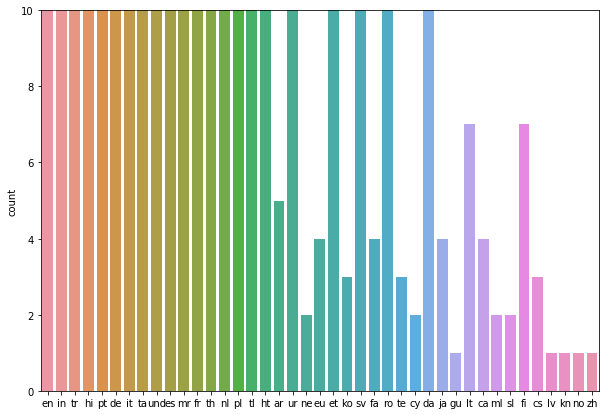

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(language)
plt.ylim([0,10])

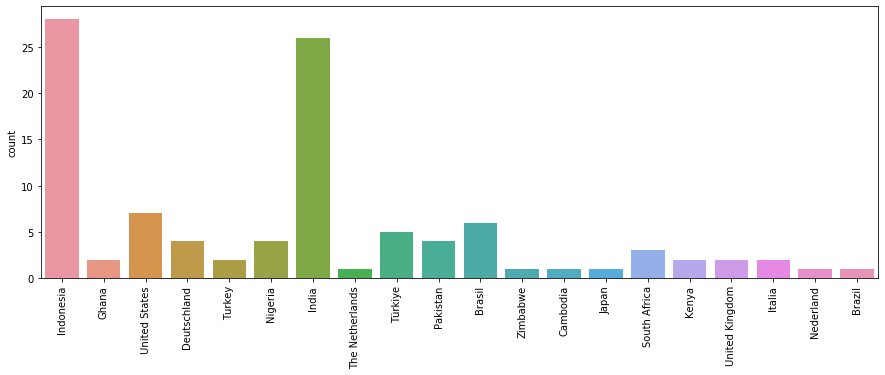

In [33]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.countplot(nations)

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2379 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packag

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2341 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56603 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-pac

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 2341 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55358 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56603 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56394 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplo

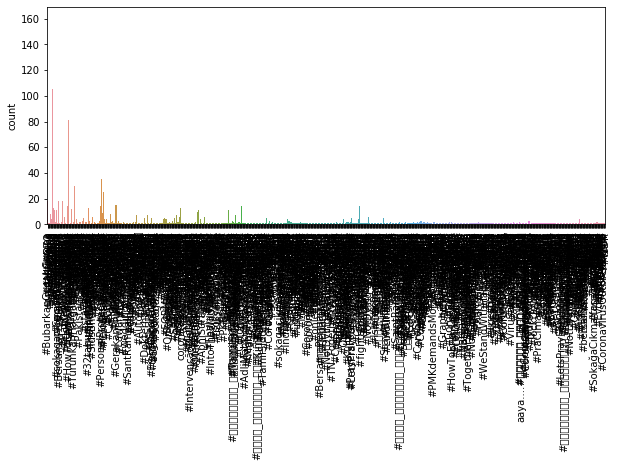

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(hash_tags)
plt.xticks(rotation=90)
plt.show()

In [37]:
import pandas as pd

In [38]:
df = pd.Series(hash_tags)

In [42]:
top_hash_tags = df.value_counts()[:15]

In [44]:
top_hash_tags

#Corona                         161
#BREAKINGNEWS                   139
#corona                         108
#COVID19                        105
#BreakingNews                    81
#PersonalProtectiveEquipment     35
#coronavirus                     30
#COVIDー19                        25
#CORONA                          24
#OnlyGodKabir_SaveUs             19
#HowToEnd_CoronaPandemic         19
#India                           18
#BubarkanCegahCorona             18
#Coronavirus                     18
#BersamaPerjuangkanKhilafah      16
dtype: int64

In [45]:
top_hash_tags.index

Index(['#Corona', '#BREAKINGNEWS', '#corona', '#COVID19', '#BreakingNews',
       '#PersonalProtectiveEquipment', '#coronavirus', '#COVIDー19', '#CORONA',
       '#OnlyGodKabir_SaveUs', '#HowToEnd_CoronaPandemic', '#India',
       '#BubarkanCegahCorona', '#Coronavirus', '#BersamaPerjuangkanKhilafah'],
      dtype='object')

In [46]:
top_hash_tags.values

array([161, 139, 108, 105,  81,  35,  30,  25,  24,  19,  19,  18,  18,
        18,  16], dtype=int64)

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


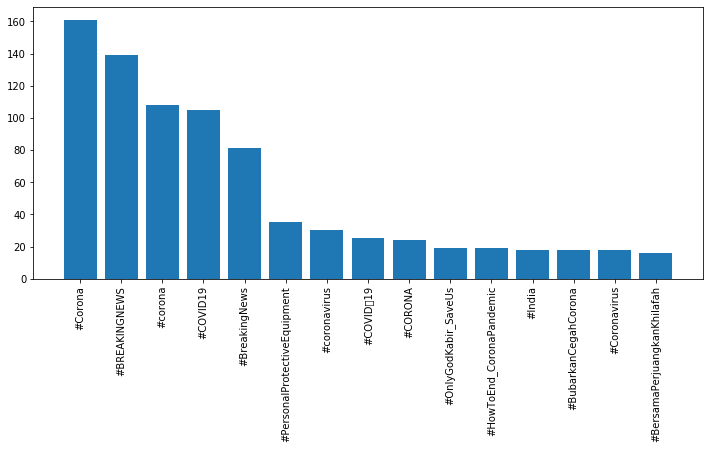

In [50]:
plt.figure(figsize=(12, 5))
plt.bar(top_hash_tags.index, top_hash_tags.values)
plt.xticks(rotation=90)
plt.show()

grras.com

grras solutions pvt ltd 